![image.png](attachment:image.png)

# Tarefa

Com base na tarefa realizada no módulo anterior, vamos fazer um diagnóstico do modelo.

Carregue a base ```previsao_de_renda2.csv```. Separe em uma base de treino e uma base de teste.

Vamos resgatar a melhor versão do modelod e previsão de renda que você fez para esta base.

- Substitua missings pela média
- Rode novamente o modelo na base de treino (ou desenvolva-o caso não tenha o registro guardado).

Este modelo deve prever a variável ```renda``` com base nas demais variáveis exceto ```data_ref``` e ```index```. Já vimos que a variável renda é melhor modelada com a transformação ```log()```, não se esqueça disso.

In [21]:
import pandas as pd
import matplotlib as plt
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('previsao_de_renda_II.csv')
df.head()

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,5762,M,S,N,0,Empresário,Superior completo,Casado,Casa,47,16.717808,2.0,11138.14
1,2015-01-01,1279,M,S,N,0,Assalariado,Superior incompleto,Casado,Casa,30,9.600000,2.0,2424.81
2,2015-01-01,14111,M,S,N,0,Assalariado,Superior completo,Casado,Casa,28,8.208219,2.0,13749.66
3,2015-01-01,8189,M,N,S,2,Assalariado,Médio,Casado,Casa,44,1.301370,4.0,2361.84
4,2015-01-01,1830,F,N,S,2,Assalariado,Superior completo,Casado,Casa,33,1.254795,4.0,790.78


In [15]:
df.isna().sum()

,0
data_ref,0
index,0
sexo,0
posse_de_veiculo,0
posse_de_imovel,0
qtd_filhos,0
tipo_renda,0
educacao,0
estado_civil,0
tipo_residencia,0


In [16]:
# Apenas no tempo temos omissos

# Tratando pela méida
df.fillna(df['tempo_emprego'].mean(), inplace=True)

#Observando o dado novamente
df.isna().sum()

,0
data_ref,0
index,0
sexo,0
posse_de_veiculo,0
posse_de_imovel,0
qtd_filhos,0
tipo_renda,0
educacao,0
estado_civil,0
tipo_residencia,0


In [17]:
# Antes de separar já sabemos os benefícios de transformar em log, então
df['log_renda'] = np.log(df['renda'])

In [18]:
#Separacao

meses_data = df['data_ref'].unique()[-3:]

print("Últimos três meses: ", meses_data)

df_test = df[df['data_ref'].isin(meses_data)].copy()
df_train = df[~df['data_ref'].isin(meses_data)].copy()


Últimos três meses:  ['2016-01-01' '2016-02-01' '2016-03-01']


In [19]:
Metadados = pd.DataFrame(df.dtypes, columns=['Dtypes']).assign(Missing = df.isna().sum(),
                                                             Valores_Unicos = df.nunique())

Metadados

,Dtypes,Missing,Valores_Unicos
data_ref,object,0,15
index,int64,0,16650
sexo,object,0,2
posse_de_veiculo,object,0,2
posse_de_imovel,object,0,2
qtd_filhos,int64,0,8
tipo_renda,object,0,5
educacao,object,0,5
estado_civil,object,0,5
tipo_residencia,object,0,6


In [20]:
X1 = '''log_renda ~ C(sexo)
                    + C(posse_de_veiculo)
                    + C(posse_de_imovel)
                    + qtd_filhos
                    + C(tipo_renda)
                    + C(educacao)
                    + C(estado_civil)
                    + C(tipo_residencia)
                    + idade
                    + tempo_emprego
                    + qt_pessoas_residencia
                    + 1'''

res_1 = smf.ols(X1, data=df_train).fit()

resumo = res_1.summary()
resumo

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_renda   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                 1.947e+04
Date:                Mon, 24 Mar 2025   Prob (F-statistic):               0.00
Time:                        13:10:05   Log-Likelihood:            -7.9748e+05
No. Observations:              600000   AIC:                         1.595e+06
Df Residuals:                  599975   BIC:                         1.595e+06
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               7.6405      0.048    160.310      0.000       7.547       7.734
C(sexo)[T.M]                            0.1354      0.003     48.568      0.000       0.130       0.141
C(posse_de_veiculo)[T.S]                0.0055      0.003      2.087      0.037       0.000       0.011
C(posse_de_imovel)[T.S]                 0.1852      0.003     71.417      0.000       0.180       0.190
C(tipo_renda)[T.Bolsista]              -0.2166      0.052     -4.129      0.000      -0.319      -0.114
C(tipo_renda)[T.Empresário]             0.1452      0.003     48.527      0.000       0.139       0.151
C(tipo_renda)[T.Pensionista]           -0.2974      0.004    -69.709      0.000      -0.306      -0.289
C(tipo_renda)[T.Servidor público]       0.1333      0.004     30.253      0.000       0.125       0.142
C(educacao)[T.Médio]                    0.0301      0.011      2.689      0.007       0.008       0.052
C(educacao)[T.Pós graduação]            0.1542      0.038      4.043      0.000       0.079       0.229
C(educacao)[T.Superior completo]        0.1233      0.011     10.896      0.000       0.101       0.146
C(educacao)[T.Superior incompleto]      0.0434      0.013      3.424      0.001       0.019       0.068
C(estado_civil)[T.Separado]             0.1793      0.023      7.792      0.000       0.134       0.224
C(estado_civil)[T.Solteiro]             0.1614      0.023      7.151      0.000       0.117       0.206
C(estado_civil)[T.União]                0.0097      0.005      2.161      0.031       0.001       0.019
C(estado_civil)[T.Viúvo]                0.1634      0.023      7.027      0.000       0.118       0.209
C(tipo_residencia)[T.Casa]             -0.0881      0.010     -8.651      0.000      -0.108      -0.068
C(tipo_residencia)[T.Com os pais]      -0.0557      0.012     -4.823      0.000      -0.078      -0.033
C(tipo_residencia)[T.Comunitário]      -0.1404      0.021     -6.835      0.000      -0.181      -0.100
C(tipo_residencia)[T.Estúdio]          -0.1408      0.017     -8.203      0.000      -0.174      -0.107
C(tipo_residencia)[T.Governamental]    -0.0942      0.012     -7.773      0.000      -0.118      -0.070
qtd_filhos                             -0.1498      0.022     -6.668      0.000      -0.194      -0.106
idade                                   0.0042      0.000     26.893      0.000       0.004       0.004
tempo_emprego                           0.1290      0.000    619.711      0.000       0.129       0.129
qt_pessoas_residencia                   0.1554      0.022      6.929      0.000       0.111       0.199
==============================================================================
Omnibus:                     1088.041   Durbin-Watson:                   1.234
Prob(Omnibus)

## Verifique as suposições do modelo

Faça uma análise para avaliar as suposições básicas:

- Os resíduos desse modelo possuem distribuição Normal (ou algo próximo)?
- Verifique a independência dos resíduos
    - Faça um gráfico dos resíduos versus os valores preditos
    - Avalie se há padrões dos resíduos versus cada uma das variáveis do modelo
    - Avalie se o valor médio dos resíduos aparenta ter relação com o mês de referência
- Avalie se a variância da variável resposta parece ser conforme os valores previstos.

Você considera que as suposições estão atendidas? Há algum impacto em eventuais desvios?

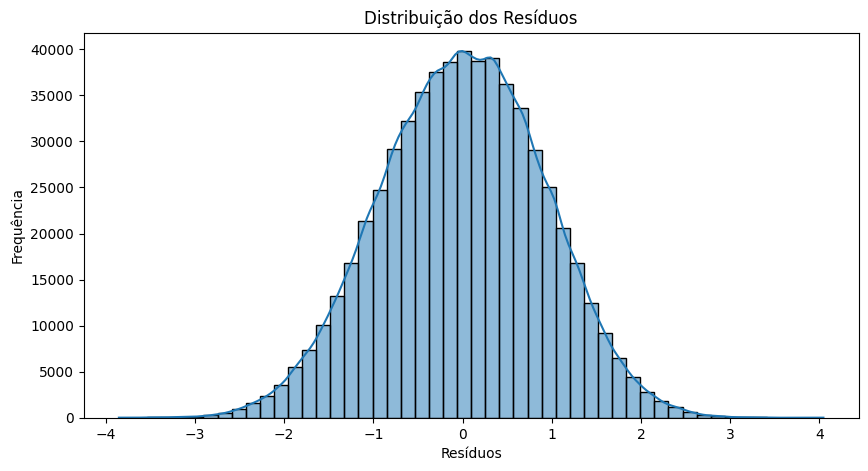

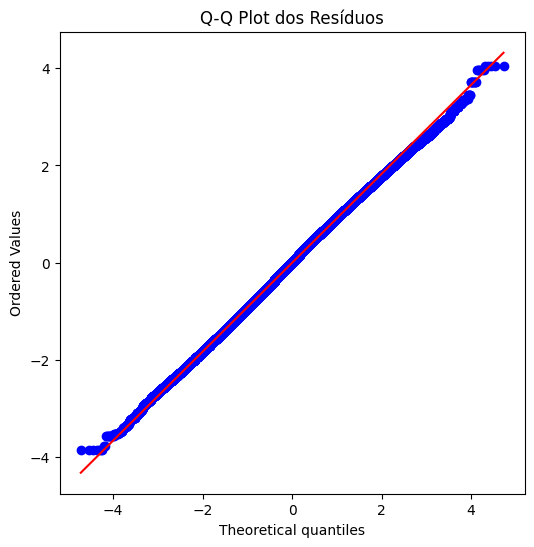

Shapiro-Wilk test:
  Estatística: 0.9988
  p-valor: 0.0007


In [22]:
# Pegando resíduos
residuos = res_1.resid

# Histograma
plt.figure(figsize=(10,5))
sns.histplot(residuos, kde=True, bins=50)
plt.title('Distribuição dos Resíduos')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.show()

# Q-Q plot
plt.figure(figsize=(6,6))
stats.probplot(residuos, dist="norm", plot=plt)
plt.title('Q-Q Plot dos Resíduos')
plt.show()

# Teste de normalidade
shapiro_test = stats.shapiro(residuos.sample(5000, random_state=42))  # amostra por limitação do Shapiro
print("Shapiro-Wilk test:")
print(f"  Estatística: {shapiro_test.statistic:.4f}")
print(f"  p-valor: {shapiro_test.pvalue:.4f}")

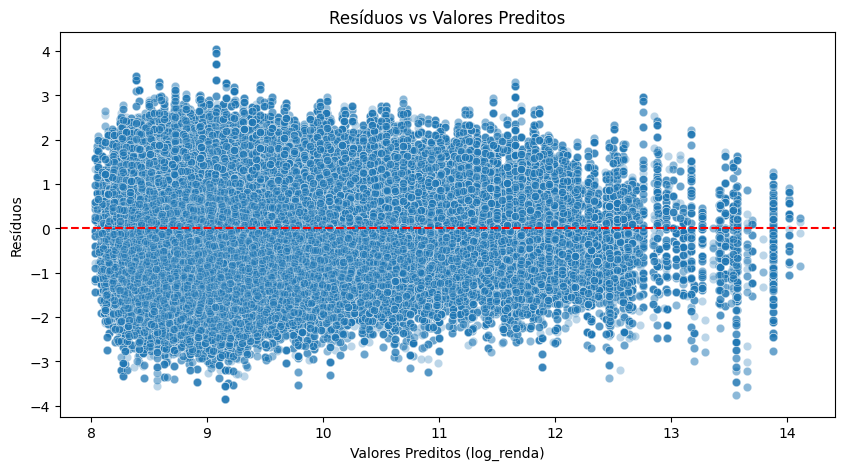

In [23]:
y_pred = res_1.fittedvalues

plt.figure(figsize=(10,5))
sns.scatterplot(x=y_pred, y=residuos, alpha=0.3)
plt.axhline(0, color='red', linestyle='--')
plt.title('Resíduos vs Valores Preditos')
plt.xlabel('Valores Preditos (log_renda)')
plt.ylabel('Resíduos')
plt.show()


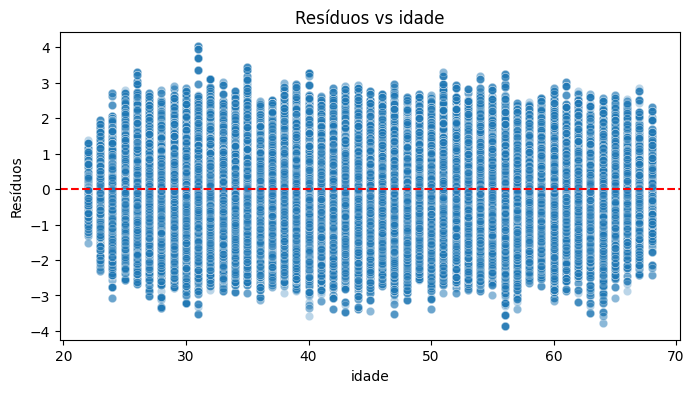

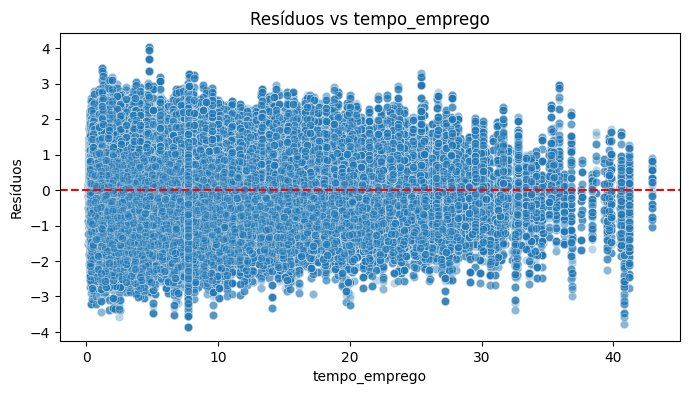

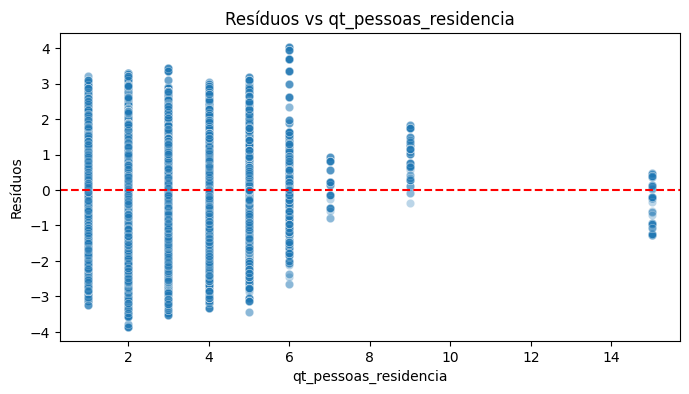

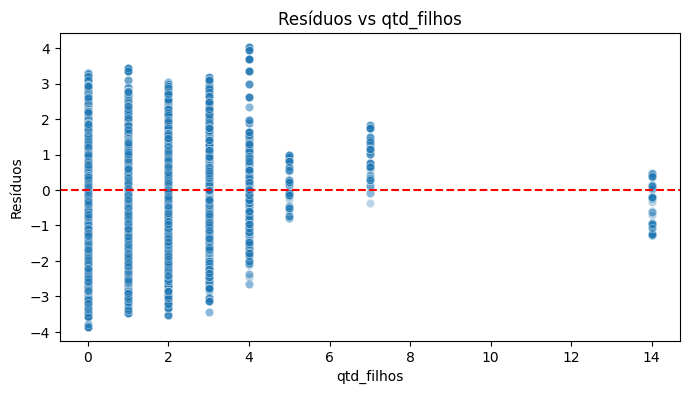

In [24]:
variaveis = ['idade', 'tempo_emprego', 'qt_pessoas_residencia', 'qtd_filhos']

for var in variaveis:
    plt.figure(figsize=(8,4))
    sns.scatterplot(x=df_train[var], y=residuos, alpha=0.3)
    plt.axhline(0, color='red', linestyle='--')
    plt.title(f'Resíduos vs {var}')
    plt.xlabel(var)
    plt.ylabel('Resíduos')
    plt.show()


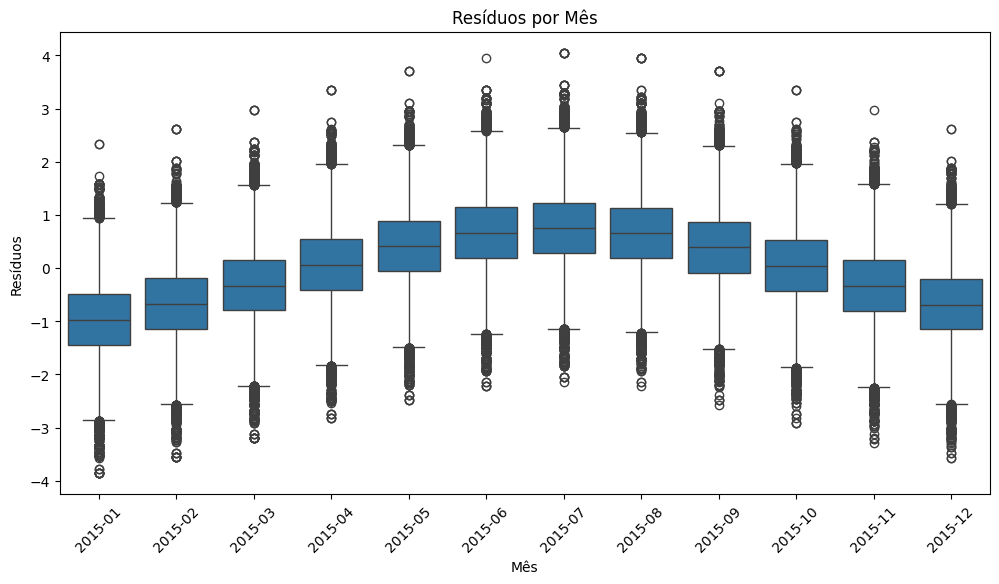

In [25]:
df_train['mes'] = pd.to_datetime(df_train['data_ref']).dt.to_period('M')
plt.figure(figsize=(12,6))
sns.boxplot(x=df_train['mes'].astype(str), y=residuos)
plt.xticks(rotation=45)
plt.title('Resíduos por Mês')
plt.xlabel('Mês')
plt.ylabel('Resíduos')
plt.show()


## Outliers

Avalie os *studentized residuals*, verifique se há pontos que parecem ser discrepantes.

Avalie se há pontos influentes.

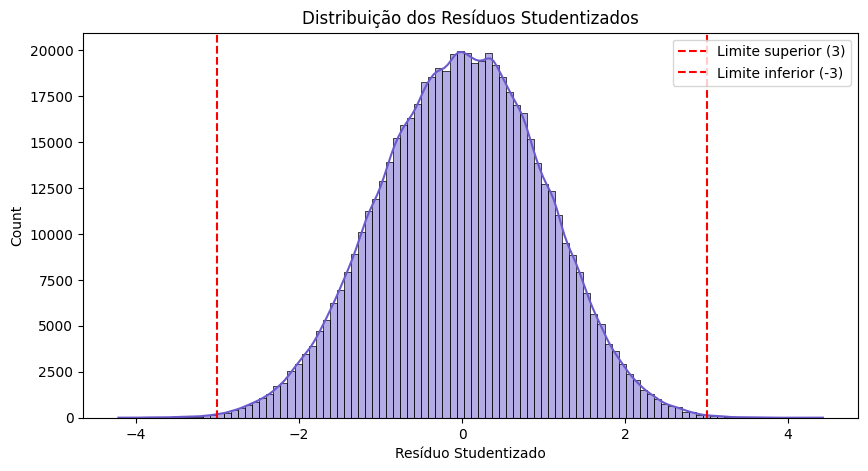

In [26]:
# Obtemos os resíduos studentizados do modelo
influence = res_1.get_influence()
studentized_residuals = influence.resid_studentized_internal

# Visualizando os resíduos studentizados
plt.figure(figsize=(10, 5))
sns.histplot(studentized_residuals, bins=100, kde=True, color='slateblue')
plt.title('Distribuição dos Resíduos Studentizados')
plt.xlabel('Resíduo Studentizado')
plt.axvline(3, color='red', linestyle='--', label='Limite superior (3)')
plt.axvline(-3, color='red', linestyle='--', label='Limite inferior (-3)')
plt.legend()
plt.show()


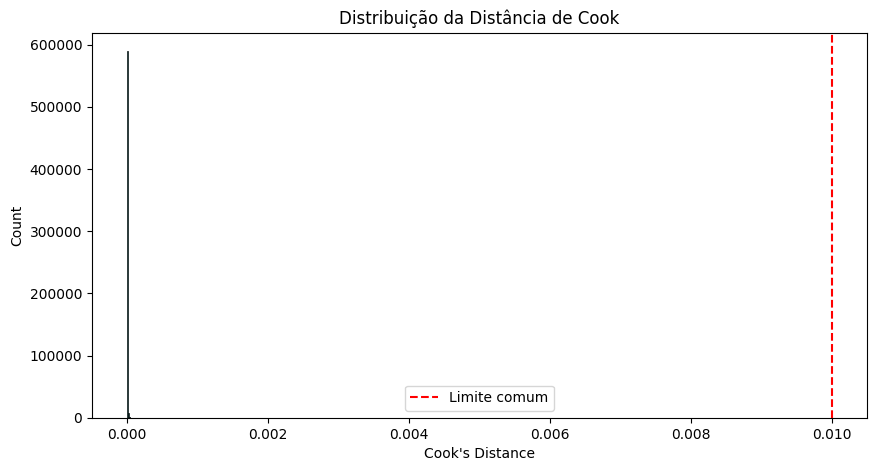

Limite comum (4/n): 0.000007
Número de pontos influentes: 24597


In [27]:
cooks_d = influence.cooks_distance[0]

plt.figure(figsize=(10, 5))
sns.histplot(cooks_d, bins=100, color='teal')
plt.title("Distribuição da Distância de Cook")
plt.xlabel("Cook's Distance")
plt.axvline(0.01, color='red', linestyle='--', label='Limite comum')
plt.legend()
plt.show()

# Ver quantos pontos são maiores que um certo limite (ex: 4/n)
limite_cook = 4 / len(df_train)
print(f"Limite comum (4/n): {limite_cook:.6f}")

# Quantos pontos influentes?
pontos_influentes = np.sum(cooks_d > limite_cook)
print(f"Número de pontos influentes: {pontos_influentes}")


Existe 24.597 pontos influentes é um número muito elevado, o que indica que uma parcela considerável do conjunto de dados está impactando fortemente os resultados do modelo.

## Multicolinearidade

Avalie se há questões relacionadas a multicolinearidade através de pelo menos:

- Matriz de correlação de Spearman
- VIF

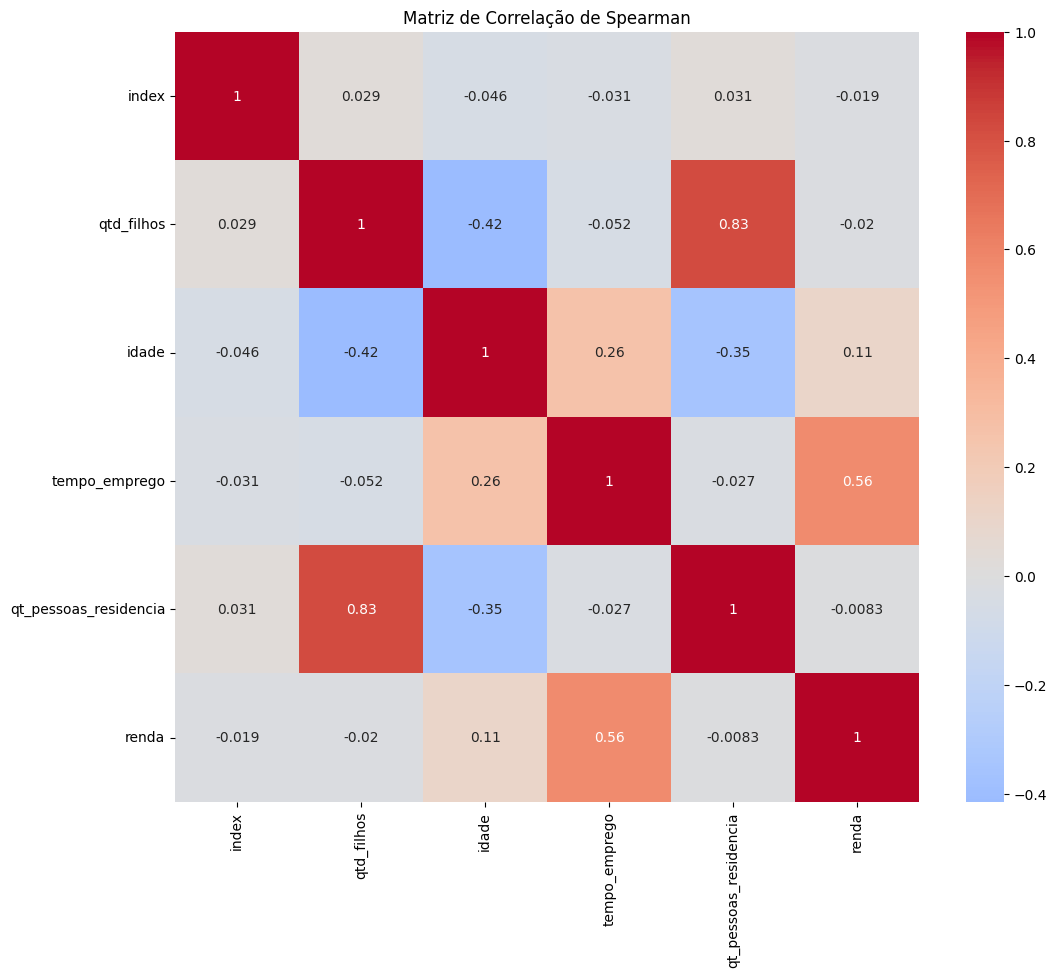

In [30]:
# Seleciona apenas colunas numéricas
df_numerico = df.select_dtypes(include='number')

# Calcula a correlação de Spearman
corr_spearman = df_numerico.corr(method='spearman')

plt.figure(figsize=(12, 10))
sns.heatmap(corr_spearman, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação de Spearman')
plt.show()


## Ajustes

Faça os ajustes que julgar necessários no modelo e compare as métricas de desempenho do modelo original e ajustado na base de testes.

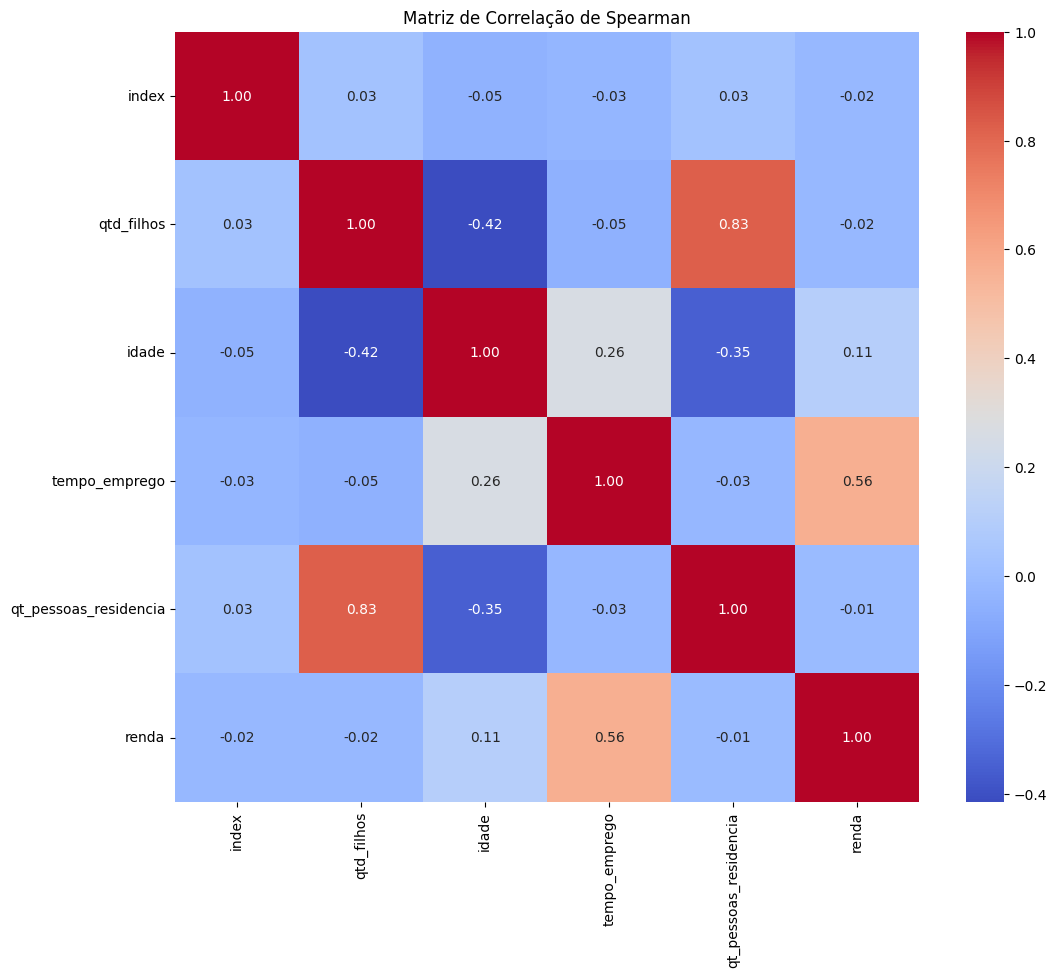

In [36]:
# Remover colunas não numéricas
df_numerico = df.select_dtypes(include=['float64', 'int64'])

# Matriz de correlação de Spearman
corr_spearman = df_numerico.corr(method='spearman')

# Visualizar
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(corr_spearman, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Matriz de Correlação de Spearman")
plt.show()


